# HEART DISEASE PREDICTION USING ASSOCIATION RULE MINING

### SUBMITTED BY  PALAK DHINGRA (18CSU151)

# HEART DISEASE DATASET

A heart attack (Cardiovascular diseases) occurs when the flow of blood to the heart muscle suddenly becomes blocked. From WHO statistics every year 17.9 million dying from heart attack. The medical study says that human life style is the main reason behind this heart problem. Apart from this there are many key factors which warns that the person may/maynot getting chance of heart attack.

<img src='heart1.png' style="width:800px;height:500px" />

# OBJECTIVE

Heart  disease  is  frightening the  people  around  the world  and  in  some  countries  it  is  the  number  one  disease  which leads  to  death.  Biomedical  research  efforts  help  to  prevent  and treat heart disease in a better way,

Mining   frequent   patterns   from   large   databases   has emerged  as  an  important  area  in  data  mining  research  and knowledge discovery community; this also contributes so much to health care domain. This heart prediction system helps to predict heart  related  problems  at  an  early  stage. 



# DATASET DESCRIPTION

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.


Content
Attribute Information:

1. age

2. sex

3. chest pain type (4 values)

4. resting blood pressure

5. serum cholestoral in mg/dl

6. fasting blood sugar > 120 mg/dl

7. resting electrocardiographic results (values 0,1,2)

8. maximum heart rate achieved

9. exercise induced angina

10. oldpeak = ST depression induced by exercise relative to rest

11. the slope of the peak exercise ST segment

12. number of major vessels (0-3) colored by flourosopy

13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

14. target: 0-healthy ; 1-unwell

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.


# STEPS 

1. Importing Libraries and Dataset

2. Visualizing dataset / EDA

3. Data Preprocessing 

4. Association Rule Mining

   4.1 Apriori    
   4.2 FP Growth
   

5. Recommendations

# IMPORTING LIBRARIES AND DATASET

In [174]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [175]:
dataset = pd.read_csv('C:\\Users\\PULKIT DHINGRA\\Downloads\\HEART2.csv')

In [176]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [177]:
dataset.shape

(1025, 14)

In [178]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# VISUALIZING DATASET/EDA

<b>Types of Chest Pain experienced by patients</b>

Percentage of Patients having typical anginal pain : 48.49%
Percentage of Patients having atypical pain : 16.29%
Percentage of Patients having non anginal pain : 27.71%
Percentage of Patients having asymptomatic pain : 7.51%


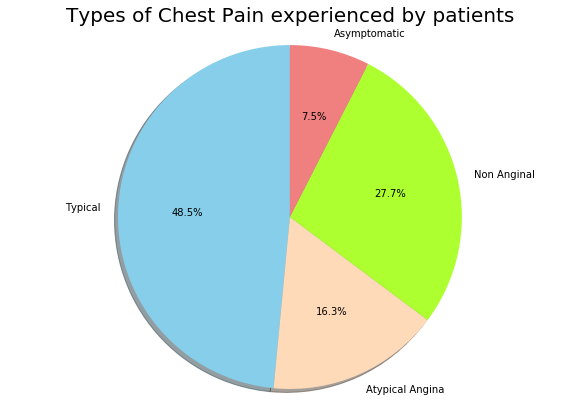

Typical Anginal is the most commom type of chest pain


In [179]:
countty = len(dataset[dataset.cp == 0])
countaty = len(dataset[dataset.cp == 1])
countnon = len(dataset[dataset.cp == 2])
countasym = len(dataset[dataset.cp == 3])
print("Percentage of Patients having typical anginal pain : {:.2f}%".format((countty / (len(dataset.cp))*100)))
print("Percentage of Patients having atypical pain : {:.2f}%".format((countaty / (len(dataset.cp))*100)))
print("Percentage of Patients having non anginal pain : {:.2f}%".format((countnon / (len(dataset.cp))*100)))
print("Percentage of Patients having asymptomatic pain : {:.2f}%".format((countasym / (len(dataset.cp))*100)))

# Data to plot
labels = 'Typical','Atypical Angina','Non Anginal','Asymptomatic'
sizes = [countty,countaty,countnon,countasym]
colors = ['skyblue', 'peachpuff','greenyellow','lightcoral']
explode = (0, 0)  # explode 1st slice
 
# Plot

fig = plt.figure(figsize =(10, 7)) 
plt.title('Types of Chest Pain experienced by patients', fontsize = 20, fontweight = 30)
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

print("Typical Anginal is the most commom type of chest pain")

<b>Relationship between chest pain type and age</b>

Typical anginal pain is mostly experienced by patients aing from 52-68


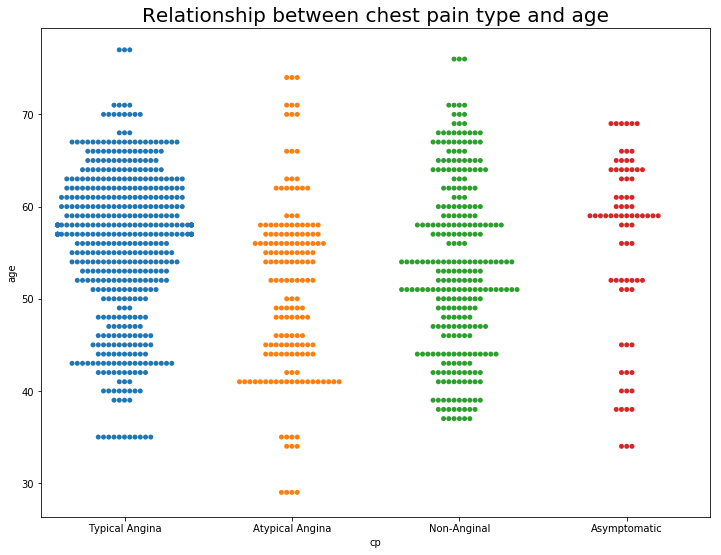

In [180]:
# relationship between chest pain type and age
dataset["cp"] = dataset.cp.map({0 : "Typical Angina" , 1 : "Atypical Angina" , 2 : "Non-Anginal" , 3 : "Asymptomatic"})
plt.title('Relationship between chest pain type and age', fontsize = 20, fontweight = 30)
sns.swarmplot(data = dataset , x = "cp" , y = "age")

print('Typical anginal pain is mostly experienced by patients aing from 52-68')

<b>Which type of chest pain denotes unwell(unhealthy heart)</b>

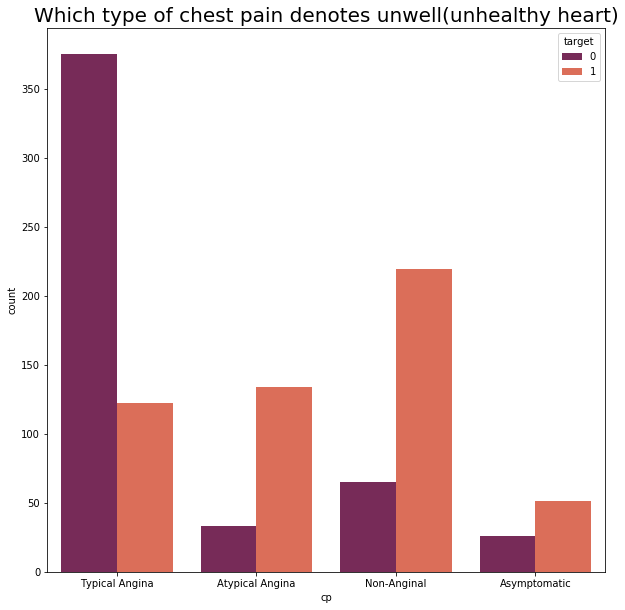

In [181]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Which type of chest pain denotes unwell(unhealthy heart)', fontsize = 20, fontweight = 30)
sns.countplot(ax=ax,x='cp' ,hue='target', data=dataset, palette='rocket')


<b>Analysis according to gender</b>

Percentage of Female Patients: 30.44%
Percentage of Male Patients: 69.56%


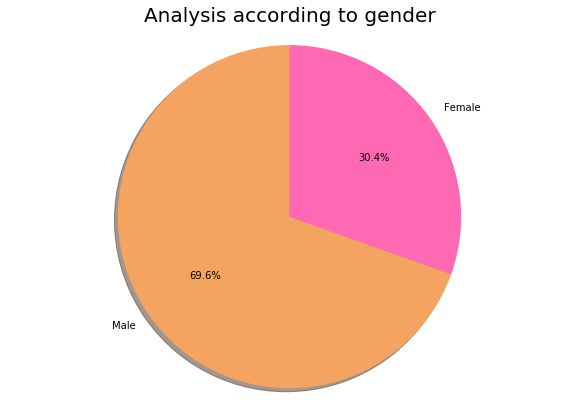

There are more male patient records in the dataset


In [182]:
countFemale = len(dataset[dataset.sex == 0])
countMale = len(dataset[dataset.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(dataset.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(dataset.sex))*100)))

# Data to plot
labels = 'Male','Female'
sizes = [countMale,countFemale]
colors = ['sandybrown', 'hotpink']
explode = (0, 0)  # explode 1st slice
 
# Plot
fig = plt.figure(figsize =(10, 7)) 
plt.title('Analysis according to gender', fontsize = 20, fontweight = 30)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

print('There are more male patient records in the dataset')

<b>Which gender has more heart patients</b>

Males tend to have healthy hearts as compared to women


Text(0.5, 1.0, 'Which gender has more heart patients')

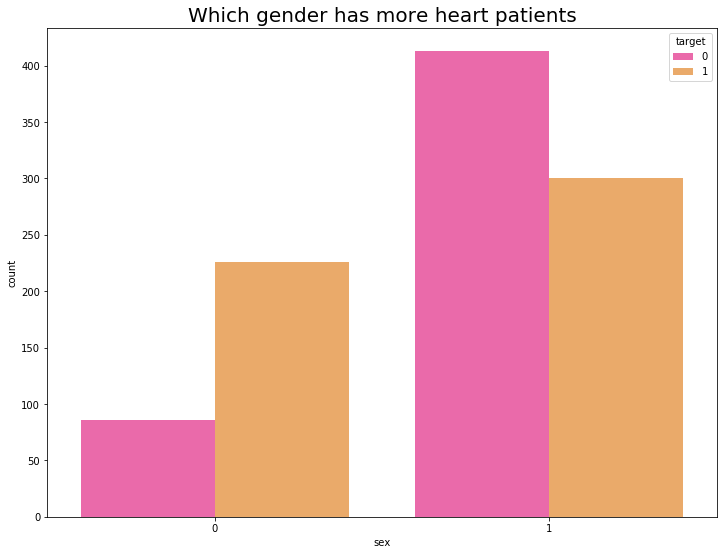

In [183]:
sns.countplot(x='sex', data=dataset, palette='spring', hue='target')
print("Males tend to have healthy hearts as compared to women")
plt.title('Which gender has more heart patients', fontsize = 20, fontweight = 30)

<b>Cholestrol vs Target</b>

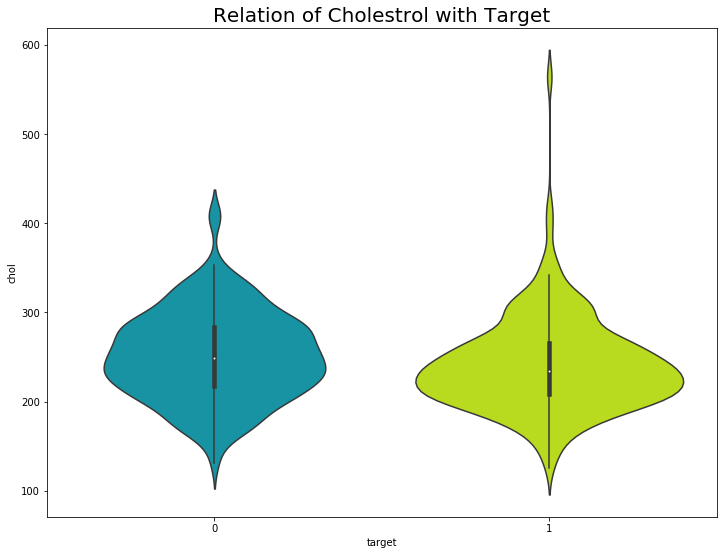

 Patients likely to suffer from heart diseases are having higher cholestrol levels in comparison to the patients with target 0(likely to not suffer from the heart diseases.


In [184]:
# cholestrol vs target

plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(dataset['target'], dataset['chol'], palette = 'nipy_spectral')
plt.title('Relation of Cholestrol with Target', fontsize = 20, fontweight = 30)
plt.show()

print(" Patients likely to suffer from heart diseases are having higher cholestrol levels in comparison to the patients with target 0(likely to not suffer from the heart diseases.")

# DATA PREPROCESSING

Categorical data related to our research was collected and binned into small categories. The cut-off values of each bins are given below,

Age:   less than 40(young),   40–59(middle age),   60   plus (elder)

Gender: 1-male, 0-female

CP:  0(typical angina),  1(atypical angina) ,2(Non-anginal pain), 3(Asymptomatic) 

BP: less than 90 (low), 90 -120 (medium), 120 plus (high)

Chol:   (>190mg/dl –ideal),(190-239mg/dl-borderline high),(<240 mg/dl –very high)

Sugar: (0-less) (1-more) 

ECG:  (Value  0:  normal)(Value  1: abnormal)

Thalach: Maximum heart rate achieved 

Target:  0- healthy , 1-unwell

In [185]:
X=dataset['age']
for i in range (0,len(dataset)):
    if(X[i] <= 40):
        X[i]='Young'
    elif (X[i]>40 and X[i]<=59):
        X[i]='Middle Age'
    elif (X[i]>= 60):
        X[i]='Elder'

C:\Users\PULKIT DHINGRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\PULKIT DHINGRA\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\PULKIT DHINGRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\PULKIT DHING

In [186]:
X

0       Middle Age
1       Middle Age
2            Elder
3            Elder
4            Elder
           ...    
1020    Middle Age
1021         Elder
1022    Middle Age
1023    Middle Age
1024    Middle Age
Name: age, Length: 1025, dtype: object

In [187]:
X=dataset['trestbps']
for i in range (0,len(dataset)):
    if(X[i]<90):
        X[i]='Low'
    elif (X[i]>90 and X[i]<120):
        X[i]='Medium'
    elif (X[i]>=120 ):
        X[i]='High'
X        

C:\Users\PULKIT DHINGRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\PULKIT DHINGRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0         High
1         High
2         High
3         High
4         High
         ...  
1020      High
1021      High
1022    Medium
1023    Medium
1024      High
Name: trestbps, Length: 1025, dtype: object

In [188]:
X=dataset['chol']
for i in range (0,len(dataset)):
    if(X[i] <190):
        X[i]='Ideal'
    elif (X[i]>190 and X[i]<239):
        X[i]='Borederline High'
    elif (X[i]>=239 ):
        X[i]='Very High'
X      

C:\Users\PULKIT DHINGRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\PULKIT DHINGRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\PULKIT DHINGRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0       Borederline High
1       Borederline High
2                  Ideal
3       Borederline High
4              Very High
              ...       
1020    Borederline High
1021           Very High
1022           Very High
1023           Very High
1024               Ideal
Name: chol, Length: 1025, dtype: object

In [189]:
dataset=dataset.replace({'fbs': {0: 'Less', 1: "More"}})

In [190]:
dataset=dataset.replace({'restecg': {0: 'Normal', 1: "Abnormal"}})

In [191]:
dataset=dataset.replace({'sex': {0: 'Female', 1: "Male"}})

In [192]:
dataset=dataset.replace({'exang': {0: 'No', 1: "Yes"}})

In [193]:
dataset=dataset.replace({'cp': {0: 'Typical Agnima', 1: "Atypical", 2: "Non Anginal", 3: "Asymptomatic"}})

In [194]:
dataset=dataset.replace({'target': {0: 'healthy', 1: "unwell"}})

In [195]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,Middle Age,Male,Typical Angina,High,Borederline High,Less,Abnormal,168,No,1.0,2,2,3,healthy
1,Middle Age,Male,Typical Angina,High,Borederline High,More,Normal,155,Yes,3.1,0,0,3,healthy
2,Elder,Male,Typical Angina,High,Ideal,Less,Abnormal,125,Yes,2.6,0,0,3,healthy
3,Elder,Male,Typical Angina,High,Borederline High,Less,Abnormal,161,No,0.0,2,1,3,healthy
4,Elder,Female,Typical Angina,High,Very High,More,Abnormal,106,No,1.9,1,3,2,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,Middle Age,Male,Atypical Angina,High,Borederline High,Less,Abnormal,164,Yes,0.0,2,0,2,unwell
1021,Elder,Male,Typical Angina,High,Very High,Less,Normal,141,Yes,2.8,1,1,3,healthy
1022,Middle Age,Male,Typical Angina,Medium,Very High,Less,Normal,118,Yes,1.0,1,1,2,healthy
1023,Middle Age,Female,Typical Angina,Medium,Very High,Less,Normal,159,No,0.0,2,0,2,unwell


In [196]:
dataset= dataset.iloc[:, [0,1,2,3,4,6,8,13]].values

In [197]:
dataset.shape


(1025, 8)

In [198]:
dataset

array([['Middle Age', 'Male', 'Typical Angina', ..., 'Abnormal', 'No',
        'healthy'],
       ['Middle Age', 'Male', 'Typical Angina', ..., 'Normal', 'Yes',
        'healthy'],
       ['Elder', 'Male', 'Typical Angina', ..., 'Abnormal', 'Yes',
        'healthy'],
       ...,
       ['Middle Age', 'Male', 'Typical Angina', ..., 'Normal', 'Yes',
        'healthy'],
       ['Middle Age', 'Female', 'Typical Angina', ..., 'Normal', 'No',
        'unwell'],
       ['Middle Age', 'Male', 'Typical Angina', ..., 'Abnormal', 'No',
        'healthy']], dtype=object)

# ASSOCIATION RULES

# APRIORI

Apriori is an algorithm for frequent item set mining and association rule learning over relational databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database. The frequent item sets determined by Apriori can be used to determine association rules which highlight general trends in the database

### Apriori implementation using apyori library 


<b>1. Converting our pandas dataframe into a list of lists</b>

The Apriori library we are going to use requires our dataset to be in the form of a list of lists, where the whole dataset is a big list and each transaction in the dataset is an inner list within the outer big list. Currently we have data in the form of a pandas dataframe. To convert our pandas dataframe into a list of lists, execute the following script:

In [199]:
# Adding all customers into a list of lists
transactions = []
for i in range(0, len(dataset)):
    transactions.append([str(dataset[i,j]) for j in range(0,8)])

In [200]:
transactions

[['Middle Age',
  'Male',
  'Typical Angina',
  'High',
  'Borederline High',
  'Abnormal',
  'No',
  'healthy'],
 ['Middle Age',
  'Male',
  'Typical Angina',
  'High',
  'Borederline High',
  'Normal',
  'Yes',
  'healthy'],
 ['Elder',
  'Male',
  'Typical Angina',
  'High',
  'Ideal',
  'Abnormal',
  'Yes',
  'healthy'],
 ['Elder',
  'Male',
  'Typical Angina',
  'High',
  'Borederline High',
  'Abnormal',
  'No',
  'healthy'],
 ['Elder',
  'Female',
  'Typical Angina',
  'High',
  'Very High',
  'Abnormal',
  'No',
  'healthy'],
 ['Middle Age',
  'Female',
  'Typical Angina',
  'Medium',
  'Very High',
  'Normal',
  'No',
  'unwell'],
 ['Middle Age',
  'Male',
  'Typical Angina',
  'Medium',
  'Very High',
  '2',
  'No',
  'healthy'],
 ['Middle Age',
  'Male',
  'Typical Angina',
  'High',
  'Very High',
  'Normal',
  'Yes',
  'healthy'],
 ['Middle Age',
  'Male',
  'Typical Angina',
  'High',
  'Very High',
  'Normal',
  'No',
  'healthy'],
 ['Middle Age',
  'Male',
  'Typical Ang

<b>2. Generating Rules</b>

<b>Support</b> is the relative frequency that the rules show up. In many instances, you may want to look for high support in order to make sure it is a useful relationship. However, there may be instances where a low support is useful if you are trying to find “hidden” relationships.


<b>Confidence</b> is a measure of the reliability of the rule. For product recommendation, a 50% confidence may be perfectly acceptable but in a medical situation, this level may not be high enough.


<b>Lift</b> is the ratio of the observed support to that expected if the two rules were independent (see wikipedia). The basic rule of thumb is that a lift value close to 1 means the rules were completely independent. Lift values > 1 are generally more “interesting” and could be indicative of a useful rule pattern.

In [201]:
from apyori import apriori
rules = apriori(transactions, min_support = 0.2, min_confidence = 0.8,min_lift = 1)

In [202]:
# Visualising the results
results = list(rules)

In [203]:
len(results)

43

In [204]:
results[4]

RelationRecord(items=frozenset({'Very High', 'High'}), support=0.43317073170731707, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Very High'}), items_add=frozenset({'High'}), confidence=0.8377358490566037, lift=1.04208646272211)])

<b> 3. Listing rules with support and confidence

In [205]:
for item in results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    for z in range(0,len(items)):
        print(" -> " + items[z])
    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

 -> High
Support: 0.8039024390243903
Confidence: 0.8039024390243903
Lift: 1.0
 -> High
 -> Elder
Support: 0.26146341463414635
Confidence: 0.8673139158576052
Lift: 1.0788795676626763
 -> Female
 -> High
Support: 0.24585365853658536
Confidence: 0.8076923076923077
Lift: 1.0047143390589992
 -> Normal
 -> High
Support: 0.40487804878048783
Confidence: 0.8350100603621731
Lift: 1.0386957668340138
 -> Very High
 -> High
Support: 0.43317073170731707
Confidence: 0.8377358490566037
Lift: 1.04208646272211
 -> Yes
 -> High
Support: 0.27707317073170734
Confidence: 0.8231884057971015
Lift: 1.0239904319684818
 -> healthy
 -> High
Support: 0.40487804878048783
Confidence: 0.8316633266533067
Lift: 1.034532657548106
 -> healthy
 -> Male
Support: 0.4029268292682927
Confidence: 0.8276553106212425
Lift: 1.1898270594484903
 -> Non-Anginal
 -> No
Support: 0.24097560975609755
Confidence: 0.8697183098591548
Lift: 1.3109724523612258
 -> unwell
 -> No
Support: 0.44390243902439025
Confidence: 0.8650190114068441
Lift

<b> 4. Store Lifts and Association rules in a list

In [206]:
lift = []
association = []
for i in range (0, len(results)):
    lift.append(results[:len(results)][i][2][0][3])
    association.append(list(results[:len(results)][i][0]))

In [207]:
lift

[1.0,
 1.0788795676626763,
 1.0047143390589992,
 1.0386957668340138,
 1.04208646272211,
 1.0239904319684818,
 1.034532657548106,
 1.1898270594484903,
 1.3109724523612258,
 1.3038889510176694,
 1.6917446709240953,
 1.336617171140301,
 1.0324988311009653,
 1.0457835724718618,
 1.1535341928724718,
 1.0218013176144243,
 1.0099985509346472,
 1.051323207015346,
 1.0219380134428677,
 1.3304508845102831,
 1.0181814095649044,
 1.0626969073490644,
 1.0637157363888983,
 1.0351291608876558,
 1.7355895939014367,
 1.025,
 1.0754829085760516,
 1.7069349967540717,
 1.2429143291257596,
 1.271200980392157,
 1.1937565356156985,
 1.6818623920645643,
 1.6929463322248892,
 1.697860665981409,
 1.2854370915032678,
 1.3204910063198831,
 1.6585021895643137,
 1.8363582288251412,
 1.3520891189093662,
 1.3370662072360322,
 1.7397784893630677,
 1.3264705882352938,
 1.8478379352847956]

<b>5. Visualizing results in a dataframe</b>

In [208]:
rank = pd.DataFrame([association, lift]).transpose()
rank.columns = ['Association', 'Lift']

In [209]:
# Show top 10 higher lift scores
rank.sort_values('Lift', ascending=False)

,Association,Lift
42,"[healthy, Yes, High, Typical Angina]",1.84784
37,"[healthy, Yes, Typical Angina]",1.83636
40,"[healthy, Male, High, Typical Angina]",1.73978
24,"[Yes, High, Typical Angina]",1.73559
27,"[healthy, Yes, High]",1.70693
33,"[healthy, Yes, Male]",1.69786
32,"[healthy, Male, Typical Angina]",1.69295
10,"[Yes, Typical Angina]",1.69174
31,"[Yes, Male, Typical Angina]",1.68186
36,"[Normal, healthy, Typical Angina]",1.6585


<b>Some Rule Interpretations</b>

1. People with very high Cholestrol levels tend to have High BP

2. Females and Elders usually have High BP


# FP GROWTH

The FP-Growth Algorithm, proposed by Han, is an efficient and scalable method for mining the complete set of frequent patterns by pattern fragment growth, using an extended prefix-tree structure for storing compressed and crucial information about frequent patterns named frequent-pattern tree (FP-tree).

### FP Grwoth implementation using fpgrowth library 


<b> 1. Converting data in form of binary values </b>

In [210]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
X= pd.DataFrame(te_ary, columns=te.columns_)
X

,2,Abnormal,Asymptomatic,Atypical Angina,Borederline High,Elder,Female,High,Ideal,Male,...,Middle Age,No,Non-Anginal,Normal,Typical Angina,Very High,Yes,Young,healthy,unwell
0,False,True,False,False,True,False,False,True,False,True,...,True,True,False,False,True,False,False,False,True,False
1,False,False,False,False,True,False,False,True,False,True,...,True,False,False,True,True,False,True,False,True,False
2,False,True,False,False,False,True,False,True,True,True,...,False,False,False,False,True,False,True,False,True,False
3,False,True,False,False,True,True,False,True,False,True,...,False,True,False,False,True,False,False,False,True,False
4,False,True,False,False,False,True,True,True,False,False,...,False,True,False,False,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,True,False,True,True,False,False,True,False,True,...,True,False,False,False,False,False,True,False,False,True
1021,False,False,False,False,False,True,False,True,False,True,...,False,False,False,True,True,True,True,False,True,False
1022,False,False,False,False,False,False,False,False,False,True,...,True,False,False,True,True,True,True,False,True,False
1023,False,False,False,False,False,False,True,False,False,False,...,True,True,False,True,True,True,False,False,False,True


<b>2. Importing Model </b>

In [211]:
from mlxtend.frequent_patterns import fpgrowth

<b> 3. Getting Frequent Itemsets</b>

In [212]:
frequent_itemsets1 = fpgrowth(X, min_support=0.2, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.803902,(High)
1,0.695610,(Male)
2,0.663415,(No)
3,0.632195,(Middle Age)
4,0.500488,(Abnormal)
...,...,...
130,0.225366,"(unwell, Middle Age, Male)"
131,0.206829,"(unwell, High, Male, No)"
132,0.240976,"(Non-Anginal, No)"
133,0.219512,"(Non-Anginal, High)"


<b> 4. All Generated Rules (with confidence > 80%) </b>

In [218]:
from mlxtend.frequent_patterns import association_rules
rules1 = association_rules(frequent_itemsets1, metric="confidence", min_threshold = .8) 

In [219]:
len(rules1)

54

In [220]:
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Male),(High),0.695610,0.803902,0.558049,0.802244,0.997937,-0.001154,0.991614
1,"(Male, No)",(High),0.431220,0.803902,0.346341,0.803167,0.999086,-0.000317,0.996266
2,"(unwell, Abnormal)",(No),0.301463,0.663415,0.267317,0.886731,1.336617,0.067322,2.971568
3,"(unwell, High, Abnormal)",(No),0.227317,0.663415,0.203902,0.896996,1.352089,0.053097,3.267683
4,(healthy),(High),0.486829,0.803902,0.404878,0.831663,1.034533,0.013515,1.164913
5,(healthy),(Male),0.486829,0.695610,0.402927,0.827655,1.189827,0.064284,1.766171
6,"(healthy, High)",(Male),0.404878,0.695610,0.324878,0.802410,1.153534,0.043241,1.540512
7,"(healthy, Male)",(High),0.402927,0.803902,0.324878,0.806295,1.002977,0.000964,1.012354
8,"(healthy, Middle Age)",(Male),0.280976,0.695610,0.242927,0.864583,1.242914,0.047477,2.247805
9,"(Very High, healthy)",(High),0.280976,0.803902,0.242927,0.864583,1.075483,0.017050,1.448105


# RECOMMENDATIONS

1. These rules can help doctors to identify risk of heart disease in a patient. and therefore can help them in preventing any further mishappening.

2. These rules can act as easy self examination for people as well. They can easy refer to these rules and check if they are at a high risk of getting heart disease or not

# THANK YOU!